# Análisis Exploratorio de Datos:

Ya con la estructura de datos normalizadas para el consumo de la herramienta de visualización, se procede a revisar la información relevante que se puede hayar en los datos.

### 1. Importar librerías:

In [32]:
import pandas as pd                                                           # Para abrir y transformar los archivos
import seaborn as sns                                                         # Para los gráficos
import matplotlib.pyplot as plt                                               # Para los estilos de gráfico
import numpy as np                                                            # Cálculos y manipulación de datos
import folium                                                                 # Para crear Mapas
from folium import plugins                                                    # Para crear Mapas
from folium.plugins import HeatMap                                            # Para crear Mapas
from IPython.display import SVG, display                                      # Abrir archivos sgv
from matplotlib.patches import Rectangle                                      # Formato de graficos (marcos)

### 2. Abrir archivo "Siniestros_Viales", crear columnas auxiliares y revisar calidad de datos:

2.1. Abrir y observar el contenido de las columnas:

In [33]:
Siniestros = pd.read_csv('Datos_Dashboard\Siniestros_Viales.csv')        # Datos de Hechos de Homicidios y Lesiones
print(Siniestros.columns)
print('--------------------\n')
Siniestros.describe()

Index(['ID', 'FECHA', 'AÑO', 'MES', 'HORA', 'SEMESTRE', 'Aux_Sem', 'VICTIMA',
       'ACUSADO', 'TIPO', 'ROL', 'SEXO', 'EDAD', 'COMUNA', 'TIPO_DE_CALLE',
       'pos x', 'pos y', 'R_Etario'],
      dtype='object')
--------------------



,AÑO,MES,SEMESTRE,EDAD,COMUNA,pos x,pos y
count,28315.000000,28315.000000,28315.000000,23791.000000,26689.000000,26888.000000,26888.000000
mean,2019.853541,6.619424,1.525234,37.849649,7.930121,-58.443001,-34.612931
std,0.930813,3.481598,0.499372,15.379800,4.545396,0.044592,0.032189
min,2016.000000,1.000000,1.000000,0.000000,1.000000,-58.531114,-34.728907
25%,2019.000000,3.000000,1.000000,27.000000,4.000000,-58.478274,-34.634239
50%,2020.000000,7.000000,2.000000,35.000000,8.000000,-58.442727,-34.613823
75%,2021.000000,10.000000,2.000000,46.000000,12.000000,-58.405443,-34.591197
max,2021.000000,12.000000,2.000000,100.000000,15.000000,-58.299633,-34.534654


- Observamos que Año está entre 2016 y 2021 (**ok**)
- Mes está entre 1 y 12 (**ok**)
- Semetre 1 y 2 (**ok**)
- Edad de cero a 100 (**ok**) tenemos un outliers (revisaremos que no conduzca moto)
- Comuna del 1 al 15 (**ok**)
- pos x (longitud) entre -58.53 y -58.29 (**ok**) dentro de CABA
- pos y (latitud) entre -34.72 y -34.53 (**ok**) dentro de CABA y un poco a sus alrededores

2.2. Revisar datos duplicados:

In [34]:
# Utilizar el método duplicated() para identificar filas duplicadas
duplicados = Siniestros.duplicated()

# Mostrar las filas duplicadas
filas_duplicadas = Siniestros[duplicados]
print("Filas duplicadas:")
print(filas_duplicadas)

# Mostrar la cantidad de filas duplicadas
cantidad_duplicados = duplicados.sum()
print(f"\nCantidad total de filas duplicadas: {cantidad_duplicados}")

Filas duplicadas:
                    ID       FECHA   AÑO  MES      HORA  SEMESTRE    Aux_Sem  \
795    LC-2019-0006638  2019-01-04  2019    1  09:45:00         1  2019-10-1   
812    LC-2019-0008238  2019-01-04  2019    1  19:33:00         1  2019-15-1   
818    LC-2019-0008388  2019-01-04  2019    1  20:47:00         1  2019-15-1   
833    LC-2019-0008860  2019-01-05  2019    1  06:28:00         1   2019-4-1   
858    LC-2019-0010436  2019-01-06  2019    1  12:30:00         1   2019-1-1   
...                ...         ...   ...  ...       ...       ...        ...   
28152  LC-2021-0511782  2021-10-15  2021   10  12:55:00         2  2021-15-2   
28212  LC-2021-0376565  2021-07-29  2021    7  16:35:00         2   2021-4-2   
28213  LC-2021-0376565  2021-07-29  2021    7  16:35:00         2   2021-4-2   
28214  LC-2021-0376565  2021-07-29  2021    7  16:35:00         2   2021-4-2   
28307  LC-2021-0305042  2021-06-28  2021    6  19:50:00         1  2021-14-1   

         VICTIMA    A

In [35]:
# 1. Crear un ID temporal que no afecte el criterio de duplicidad
Siniestros['ID_TEMPORAL'] = range(len(Siniestros))

# 2. Filtrar Siniestros por el concepto inicial y el ID temporal para obtener filas_duplicadas_moto_3_o_mas
siniestros_filtrados = Siniestros[Siniestros['VICTIMA'] == 'MOTO'][['EDAD', 'SEXO', 'ID_TEMPORAL']]

# 3. Eliminar los duplicados de filas_duplicadas_moto_3_o_mas
filas_duplicadas_moto_3_o_mas_sin_duplicados = siniestros_filtrados.drop_duplicates(subset=['EDAD', 'SEXO'])

# 4. Eliminar los registros correspondientes de Siniestros basándote en el ID temporal
Siniestros_sin_duplicados = Siniestros[~Siniestros['ID_TEMPORAL'].isin(filas_duplicadas_moto_3_o_mas_sin_duplicados['ID_TEMPORAL'])]

# Eliminar la columna temporal creada
Siniestros_sin_duplicados = Siniestros_sin_duplicados.drop('ID_TEMPORAL', axis=1)

# Muestra el DataFrame resultante
print("Siniestros sin duplicados basándote en 'EDAD' y 'SEXO':")
print(Siniestros_sin_duplicados)

# Muestra la cantidad total después de eliminar duplicados en 'EDAD' y 'SEXO' en Siniestros
cantidad_total_sin_duplicados = len(Siniestros_sin_duplicados)
print(f"\nCantidad total después de eliminar duplicados en 'EDAD' y 'SEXO' en Siniestros: {cantidad_total_sin_duplicados}")


Siniestros sin duplicados basándote en 'EDAD' y 'SEXO':
                    ID       FECHA   AÑO  MES      HORA  SEMESTRE    Aux_Sem  \
1            2016-0002  2016-01-02  2016    1  01:15:00         1   2016-9-1   
5            2016-0008  2016-01-24  2016    1  18:30:00         1   2016-8-1   
6            2016-0009  2016-01-24  2016    1  19:10:00         1  2016-11-1   
7            2016-0010  2016-01-29  2016    1  15:20:00         1   2016-9-1   
9            2016-0013  2016-02-10  2016    2  11:30:00         1   2016-1-1   
...                ...         ...   ...  ...       ...       ...        ...   
28310  LC-2021-0451911  2021-09-11  2021    9  18:00:00         2  2021-14-2   
28311  LC-2021-0530228  2021-10-25  2021   10  12:00:00         2  2021-14-2   
28312  LC-2021-0530228  2021-10-25  2021   10  12:00:00         2  2021-14-2   
28313  LC-2021-0201378  2021-05-02  2021    5  00:00:00         1        NaN   
28314  LC-2021-0229350  2021-05-19  2021    5  00:00:00         

In [36]:
Siniestros[Siniestros['ID'] == 'LC-2019-0188476']

,ID,FECHA,AÑO,MES,HORA,SEMESTRE,Aux_Sem,VICTIMA,ACUSADO,TIPO,ROL,SEXO,EDAD,COMUNA,TIPO_DE_CALLE,pos x,pos y,R_Etario,ID_TEMPORAL
3442,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,FEMENINO,76.0,12.0,NaN,-58.509738,-34.574865,Vejez,3442
3443,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,MASCULINO,76.0,12.0,NaN,-58.509738,-34.574865,Vejez,3443
3444,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,FEMENINO,25.0,12.0,NaN,-58.509738,-34.574865,Juventud,3444
3445,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,MASCULINO,54.0,12.0,NaN,-58.509738,-34.574865,Adultez,3445
3446,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,FEMENINO,29.0,12.0,NaN,-58.509738,-34.574865,Adultez,3446
3447,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,FEMENINO,45.0,12.0,NaN,-58.509738,-34.574865,Adultez,3447
3448,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,MASCULINO,32.0,12.0,NaN,-58.509738,-34.574865,Adultez,3448
3449,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,FEMENINO,21.0,12.0,NaN,-58.509738,-34.574865,Juventud,3449
3450,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,FEMENINO,47.0,12.0,NaN,-58.509738,-34.574865,Adultez,3450
3451,LC-2019-0188476,2019-03-26,2019,3,17:45:00,1,2019-12-1,NaN,NaN,LEVE,SD,MASCULINO,66.0,12.0,NaN,-58.509738,-34.574865,Vejez,3451


Dado que si se encontraron casos como el ejemplo de víctimas en MOTO, más de dos, y que a su vez coinciden en edad y sexo. solo para estos casos se eliminarán duplicados.

A continuación se procede con la elimnación de duplicados:

In [37]:
# Filtra las filas donde 'VICTIMA' es igual a 'MOTO'
siniestros_moto = Siniestros[Siniestros['VICTIMA'] == 'MOTO']

# Identifica las filas duplicadas basándote en 'EDAD' y 'SEXO'
duplicados_edad_sexo = siniestros_moto.duplicated(subset=['EDAD', 'SEXO'])

# Filtra las filas duplicadas basándote en 'EDAD' y 'SEXO' y donde la cantidad de duplicados es mayor o igual a 3
filas_duplicadas_moto_3_o_mas = siniestros_moto[duplicados_edad_sexo & (siniestros_moto.duplicated() | siniestros_moto.duplicated(keep='last') | siniestros_moto.duplicated(keep=False))]

# Filtra las filas en Siniestros basándote en 'EDAD' y 'SEXO' de filas_duplicadas_moto_3_o_mas y elimina las duplicadas
Siniestros_sin_duplicados = Siniestros[~Siniestros[['EDAD', 'SEXO']].isin(filas_duplicadas_moto_3_o_mas[['EDAD', 'SEXO']]).all(axis=1) | Siniestros.index.isin(filas_duplicadas_moto_3_o_mas.index)]

Siniestros = Siniestros_sin_duplicados.drop(['ID_TEMPORAL'], axis=1)

# Muestra la cantidad total después de eliminar duplicados en 'EDAD' y 'SEXO' en Siniestros
cantidad_total_sin_duplicados = len(Siniestros)
print(f"\nCantidad total después de eliminar duplicados en 'EDAD' y 'SEXO' en Siniestros: {cantidad_total_sin_duplicados}")



Cantidad total después de eliminar duplicados en 'EDAD' y 'SEXO' en Siniestros: 28315


Los registros duplicados son producto de la falta de información o simplemente información coincidente en siniestros con varias víctimas, se había revisado desde el inicio que el número de víctimas tanto en los en Homicidios como Lesionados fuera igual al número de registros. Por ejemplo el registro LC-2021-0376565 (6 víctimas en transporte público de las cuales no se obtuvo datos de sexo y edad van a aparecer duplicados cuando en realidad no lo son) Suponiendo entonces, que en las hojas de "Hechos" tanto para Homicidios como para Lesionados registran el dato de número de víctimas antes de caracterizar a cada una (no como un campo automático que se alimenta de la misma). No se halla razón alguna para eliminar duplicados de las víctimas (A menos que si hayan coincidencia en edad y sexo pero además vayan en MOTO).

lo anterior me obliga a comprobarlo.

In [38]:
Siniestros.head(3)

,ID,FECHA,AÑO,MES,HORA,SEMESTRE,Aux_Sem,VICTIMA,ACUSADO,TIPO,ROL,SEXO,EDAD,COMUNA,TIPO_DE_CALLE,pos x,pos y,R_Etario
0,2016-0001,2016-01-01,2016,1,04:00:00,1,2016-8-1,MOTO,AUTO,HOMICIDIO,CONDUCTOR,MASCULINO,19.0,8.0,AVENIDA,-58.475340,-34.687570,Juventud
1,2016-0002,2016-01-02,2016,1,01:15:00,1,2016-9-1,AUTO,PASAJEROS,HOMICIDIO,CONDUCTOR,MASCULINO,70.0,9.0,GRAL PAZ,-58.508775,-34.669777,Vejez
2,2016-0003,2016-01-03,2016,1,07:00:00,1,2016-1-1,MOTO,AUTO,HOMICIDIO,CONDUCTOR,MASCULINO,30.0,1.0,AVENIDA,-58.390403,-34.631894,Adultez


Se elimnaron columnas auxiliares que hacen falta para hacer análisis más rápido asi que se recuperarán desde este notebook dado que el ETL, en especial el de Lesiones, requirió muchas transformaciones demoradas como la conversión de georeferenciación plana a coordenada.

2.3. Corregir tipo de dato en "FECHA" y Crear columna DIA y HR:

In [39]:
# Convierte la columna 'FEHA' a tipo fecha
Siniestros['FECHA'] = pd.to_datetime(Siniestros['FECHA'], errors='coerce')

# Crea una nueva columna 'DIA' de tipo entero
Siniestros['DIA'] = Siniestros['FECHA'].dt.day

# Convierte la columna 'HORA' a tipo hora
Siniestros['HORA'] = pd.to_datetime(Siniestros['HORA'], errors='coerce')

# Crea una nueva columna 'HR' que contenga solo la hora en valor entero (1 a 24 horas)
Siniestros['HR'] = Siniestros['HORA'].dt.hour.where(Siniestros['HORA'].notnull(), Siniestros['HORA'])

# Elimina la columna original 'HORA'
Siniestros.drop('HORA', axis=1, inplace=True)

Siniestros.head(2)

C:\Users\davin\AppData\Local\Temp\ipykernel_29548\251344534.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Siniestros['HORA'] = pd.to_datetime(Siniestros['HORA'], errors='coerce')


,ID,FECHA,AÑO,MES,SEMESTRE,Aux_Sem,VICTIMA,ACUSADO,TIPO,ROL,SEXO,EDAD,COMUNA,TIPO_DE_CALLE,pos x,pos y,R_Etario,DIA,HR
0,2016-0001,2016-01-01,2016,1,1,2016-8-1,MOTO,AUTO,HOMICIDIO,CONDUCTOR,MASCULINO,19.0,8.0,AVENIDA,-58.475340,-34.687570,Juventud,1,4.0
1,2016-0002,2016-01-02,2016,1,1,2016-9-1,AUTO,PASAJEROS,HOMICIDIO,CONDUCTOR,MASCULINO,70.0,9.0,GRAL PAZ,-58.508775,-34.669777,Vejez,2,1.0


In [40]:
# Reemplaza los valores "SD" por NaN
df=Siniestros

df.replace("SD", pd.NA, inplace=True)

# Cuenta los valores nulos por columna, incluyendo "SD"
nulos_por_columna = df.isna().sum()

# Muestra el resultado
print("Cantidad de valores nulos por columna, incluyendo 'SD':")
print(nulos_por_columna)

Cantidad de valores nulos por columna, incluyendo 'SD':
ID                   0
FECHA                0
AÑO                  0
MES                  0
SEMESTRE             0
Aux_Sem           1626
VICTIMA          12944
ACUSADO          17941
TIPO                 0
ROL              15301
SEXO              2234
EDAD              4524
COMUNA            1626
TIPO_DE_CALLE    12879
pos x             1427
pos y             1427
R_Etario             0
DIA                  0
HR                   9
dtype: int64


Para entender la cuenta de datos nulos, se tiene presente no solo donde no hay datos, sino también registros como "SD" de lo anterior tenemos:

- "Aux_Fecha" tiene datos nulos cuando Fecha no, así que algo falló en la creación del campo. (Se deben imputar nulos)
- "VICTIMA" y "ACUSADO" tenía regristros "SD" y se dejaron debido a que los hechos existieron y deben matenerse para no afectar los conteos.
- "TIPO_CALLE" también tenía registros "SD" al igual que "VICTIMA" la mayoría del dataset de Lesionados, se deja para los conteos de otras variables.
- Lo mismo para los otros campos como "SEXO", "EDAD", "COMUNA", "pos x" y "pos y" sobre las cuales se realizaron en los ETL las imputaciones posibles. En especial en COMUNA con algunas direcciones y avenidas, también con las coordenadas al usar la georeferenciación plana.

A continuación se procede a revisar variables "Aux_Sem" y HR que deben poderse imputar:

In [41]:
# Imputa los valores nulos en 'Aux_Sem' según la condición dada
Siniestros.loc[(Siniestros['MES'] <= 6) & Siniestros['Aux_Sem'].isna(), 'Aux_Sem'] = 1
Siniestros.loc[(Siniestros['MES'] > 6) & Siniestros['Aux_Sem'].isna(), 'Aux_Sem'] = 2

# Revisar que no hayan nulos
Aux_sem = Siniestros[Siniestros['Aux_Sem'].isna()]
print('Nulos en Aux_Sem: ',Aux_sem.count().sum())

Nulos en Aux_Sem:  0


Revisar Hora:

In [42]:
# Revisar que no hayan nulos
HR = Siniestros[Siniestros['HR'].isna()]
print('Nulos en HR: ',HR.count().sum())

Nulos en HR:  130


Revisando los ETL, no se documentó que estos registros no tenían hora y estaban como "SD" tanto en el campo hora como el campo "HR"

2.5. Exportamos el documento con los cambios realizados a SCV en la carpeta "Datos_Dashboard" para que se actualicen los cambios:

In [43]:
Siniestros.columns

Index(['ID', 'FECHA', 'AÑO', 'MES', 'SEMESTRE', 'Aux_Sem', 'VICTIMA',
       'ACUSADO', 'TIPO', 'ROL', 'SEXO', 'EDAD', 'COMUNA', 'TIPO_DE_CALLE',
       'pos x', 'pos y', 'R_Etario', 'DIA', 'HR'],
      dtype='object')

In [44]:
# Definir el orden de las columnas
column_order = ['ID', 'FECHA', 'AÑO', 'MES', 'DIA', 'HR', 'SEMESTRE', 'Aux_Sem', 'VICTIMA',
       'ACUSADO', 'TIPO', 'ROL', 'SEXO', 'EDAD','R_Etario', 'COMUNA', 'TIPO_DE_CALLE',
       'pos x', 'pos y']

# Seleccionar el orden deseado
Siniestros = Siniestros[column_order]

# Guarda el DataFrame en un archivo CSV
Siniestros.to_csv('Datos_Dashboard/Siniestros_Viales.csv', index=False)

## Análisis de Información:

#### A continuación con los datos arreglados se procede a realizar diferentes gráficos para entender que tipo de infromación se podrá extraer en el dashboard:

### 3. Clasificación de las víctimas por el tipo de vehículo en el que se transportaba:

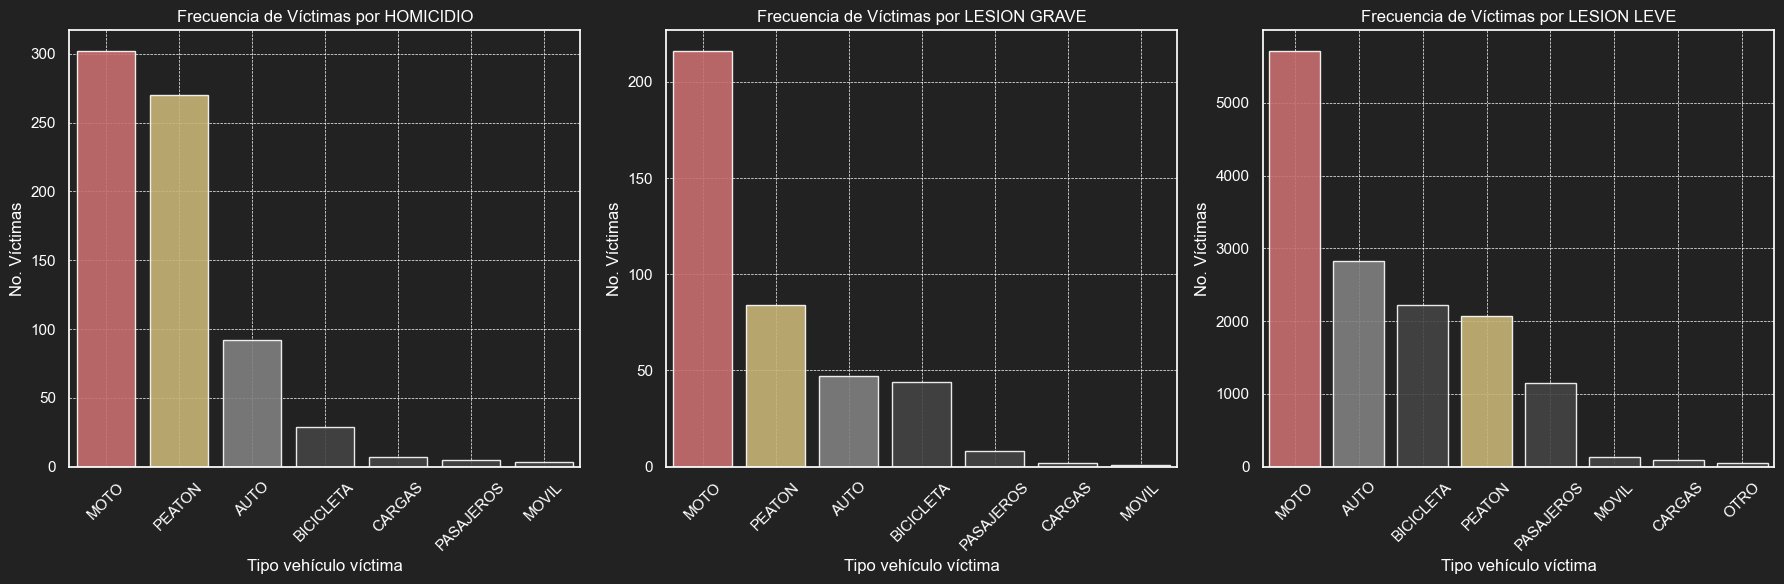

In [45]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']
datos_agrupados_homicidios = homicidios.groupby('VICTIMA').size().sort_values(ascending=False)

# Filtrar por LESION GRAVE
Lesion_Grave = Siniestros[Siniestros['TIPO'] == 'GRAVE']
datos_agrupados_Lesion_Grave = Lesion_Grave.groupby('VICTIMA').size().sort_values(ascending=False)

# Filtrar por LESION LEVE
Lesion_Leve = Siniestros[Siniestros['TIPO'] == 'LEVE']
datos_agrupados_Lesion_Leve = Lesion_Leve.groupby('VICTIMA').size().sort_values(ascending=False)

# Crear un diccionario de colores específicos para cada etiqueta
colores_dict = {'MOTO': 'r', 'PEATON': 'y', 'AUTO': 'gray'}

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='#222222')

# Gráfico para HOMICIDIO
sns.barplot(ax=axes[0], x=datos_agrupados_homicidios.index, y=datos_agrupados_homicidios.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_homicidios.index], order=datos_agrupados_homicidios.index, alpha=0.9)
axes[0].set_title('Frecuencia de Víctimas por HOMICIDIO', color='white')
axes[0].set_ylabel('No. Víctimas', color='white')
axes[0].set_xlabel('Tipo vehículo víctima', color='white')
axes[0].tick_params(axis='x', rotation=45, labelcolor='w')
axes[0].tick_params(axis='y', labelcolor='w')
axes[0].grid(color='w', linestyle='--', linewidth=0.5)
axes[0].set_facecolor('#222222')

# Gráfico para LESION GRAVE
sns.barplot(ax=axes[1], x=datos_agrupados_Lesion_Grave.index, y=datos_agrupados_Lesion_Grave.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_Lesion_Grave.index], order=datos_agrupados_Lesion_Grave.index, alpha=0.9)
axes[1].set_title('Frecuencia de Víctimas por LESION GRAVE', color='white')
axes[1].set_ylabel('No. Víctimas', color='white')
axes[1].set_xlabel('Tipo vehículo víctima', color='white')
axes[1].tick_params(axis='x', rotation=45, labelcolor='w')
axes[1].tick_params(axis='y', labelcolor='w')
axes[1].grid(color='w', linestyle='--', linewidth=0.5)
axes[1].set_facecolor('#222222')

# Gráfico para LESION LEVE
sns.barplot(ax=axes[2], x=datos_agrupados_Lesion_Leve.index, y=datos_agrupados_Lesion_Leve.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_Lesion_Leve.index], order=datos_agrupados_Lesion_Leve.index, alpha=0.9)
axes[2].set_title('Frecuencia de Víctimas por LESION LEVE', color='white')
axes[2].set_ylabel('No. Víctimas', color='white')
axes[2].set_xlabel('Tipo vehículo víctima', color='white')
axes[2].tick_params(axis='x', rotation=45, labelcolor='w')
axes[2].tick_params(axis='y', labelcolor='w')
axes[2].grid(color='w', linestyle='--', linewidth=0.5)
axes[2].set_facecolor('#222222')

plt.tight_layout()
plt.show()


Es importante analizar que siempre antes de un evento mortal existen miles de eventos con lesiones menores, esto en el ámbito industrial se conoce como "Teoría de la Causalidad de los accidentes" lo que se resume en que cada evento mortal está asociado a miles de eventos con daños graves, que a su ves se relacionan con cientos de miles de eventos de lesiones leves (ver: https://es.wikipedia.org/wiki/Pir%C3%A1mide_de_Bird)

Con este gráfico se quería analizar la concordancia entre Lesiones y Homicidios asociados a accidentes viales, con respecto del tipo de vehículo de la víctima. Lo fue para el caso de la "MOTO" con la accidentalidad más alta en la Ciudad Autónoma de Buenos Aires(CABA).

Vale la pena analizar como en el caso del Peatón la conversión entre lesiones y Homicidios es excesivamente alto, caso contrario al de los ciclistas que aunque generan miles de reportes de lesionados, las muertes son menores a los peatones. Esto significa que los peatones tienen el mayor riesgo de morir en un accidente, al igual que las motos. Lo cual sería lógico al estar más vulnerables en cualquier siniestro.

### 4. Clasificación de las víctimas por sexo:

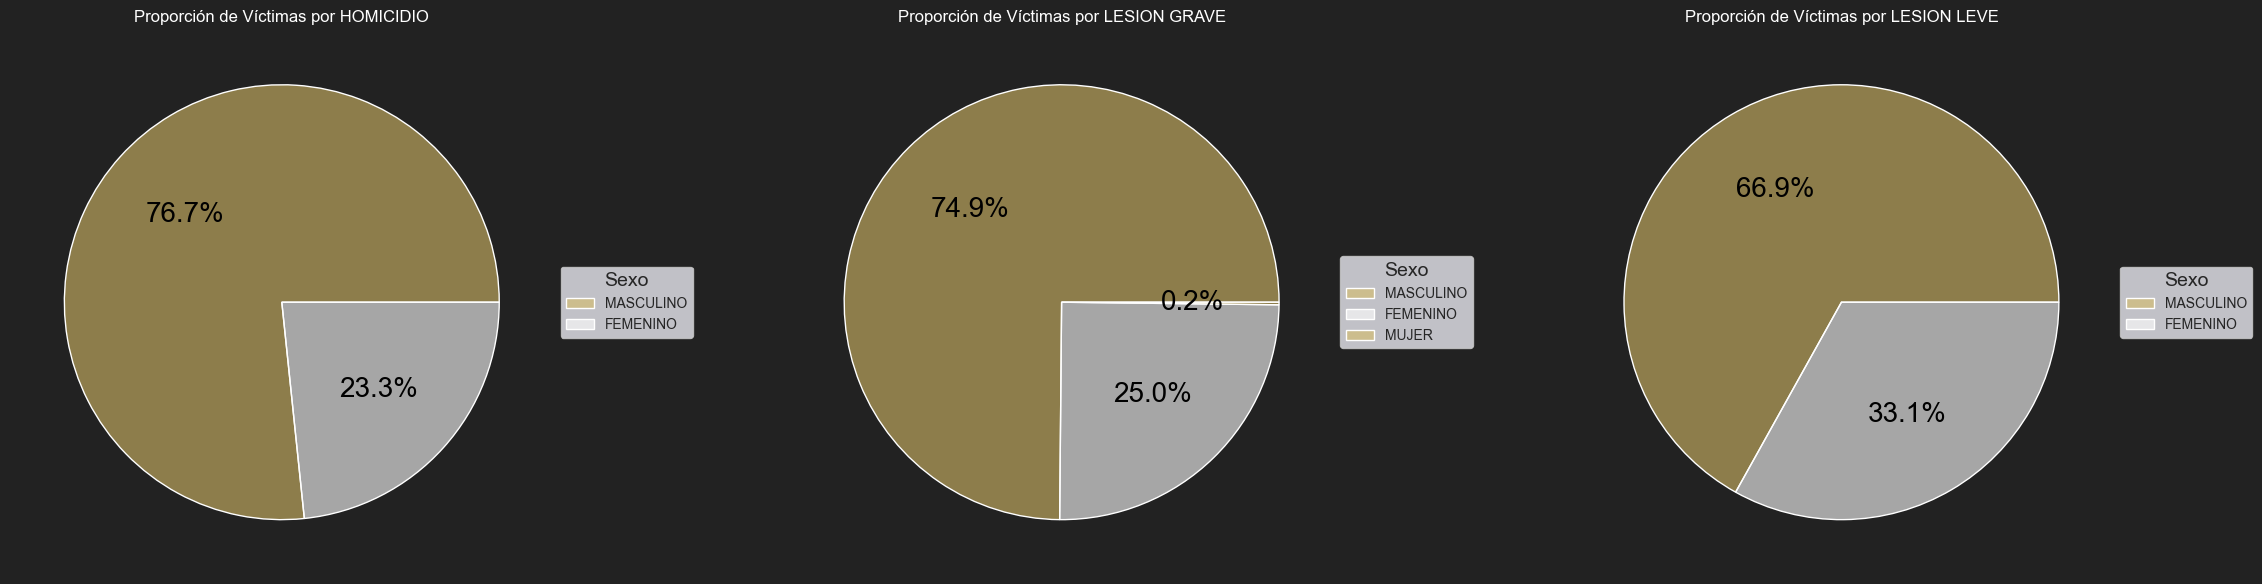

In [46]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']
datos_agrupados_homicidios = homicidios.groupby('SEXO').size().sort_values(ascending=False)

# Filtrar por LESION GRAVE
lesiones_grave = Siniestros[Siniestros['TIPO'] == 'GRAVE']
datos_agrupados_lesiones_grave = lesiones_grave.groupby('SEXO').size().sort_values(ascending=False)

# Filtrar por LESION LEVE
lesiones_leve = Siniestros[Siniestros['TIPO'] == 'LEVE']
datos_agrupados_lesiones_leve = lesiones_leve.groupby('SEXO').size().sort_values(ascending=False)

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(24, 6), facecolor='#222222')

# Gráfico de Torta para HOMICIDIO
colors_homicidio = ['y', 'w']
colors_homicidio_transparentes = [(color[0], color[1], color[2], 0.6) for color in sns.color_palette(colors_homicidio)]
axes[0].set_title('Proporción de Víctimas por HOMICIDIO', color='white')
axes[0].set_facecolor('#222222')
wedges_homicidio, text_homicidio, autotext_homicidio = axes[0].pie(
    datos_agrupados_homicidios,
    labels=None,
    autopct='%1.1f%%',
    colors=colors_homicidio_transparentes,
    textprops={'color': 'black', 'size': 20}
)
labels_homicidio = datos_agrupados_homicidios.index
axes[0].legend(wedges_homicidio, labels_homicidio, title='Sexo', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), title_fontsize='14', fontsize='10')
axes[0].set_title('Proporción de Víctimas por HOMICIDIO', color='white')
axes[0].set_facecolor('#222222')

# Gráfico de Torta para LESION GRAVE
colors_lesion_grave = ['y', 'w']
colors_lesion_grave_transparentes = [(color[0], color[1], color[2], 0.6) for color in sns.color_palette(colors_lesion_grave)]
axes[1].set_title('Proporción de Víctimas por LESION GRAVE', color='white')
axes[1].set_facecolor('#222222')
wedges_lesion_grave, text_lesion_grave, autotext_lesion_grave = axes[1].pie(
    datos_agrupados_lesiones_grave,
    labels=None,
    autopct='%1.1f%%',
    colors=colors_lesion_grave_transparentes,
    textprops={'color': 'black', 'size': 20}
)
labels_lesion_grave = datos_agrupados_lesiones_grave.index
axes[1].legend(wedges_lesion_grave, labels_lesion_grave, title='Sexo', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), title_fontsize='14', fontsize='10')
axes[1].set_title('Proporción de Víctimas por LESION GRAVE', color='white')
axes[1].set_facecolor('#222222')

# Gráfico de Torta para LESION LEVE
colors_lesion_leve = ['y', 'w']
colors_lesion_leve_transparentes = [(color[0], color[1], color[2], 0.6) for color in sns.color_palette(colors_lesion_leve)]
axes[2].set_title('Proporción de Víctimas por LESION LEVE', color='white')
axes[2].set_facecolor('#222222')
wedges_lesion_leve, text_lesion_leve, autotext_lesion_leve = axes[2].pie(
    datos_agrupados_lesiones_leve,
    labels=None,
    autopct='%1.1f%%',
    colors=colors_lesion_leve_transparentes,
    textprops={'color': 'black', 'size': 20}
)
labels_lesion_leve = datos_agrupados_lesiones_leve.index
axes[2].legend(wedges_lesion_leve, labels_lesion_leve, title='Sexo', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), title_fontsize='14', fontsize='10')
axes[2].set_title('Proporción de Víctimas por LESION LEVE', color='white')
axes[2].set_facecolor('#222222')

plt.tight_layout()
plt.show()



Los diferentes reportes de "Buenos Aires Data" afirman que hay más hombres que conducen en CABA, por tanto mayor probabilidad de tener siniestros mortales. En las herramientas de visualización vale la pena si esta tendencia se conserva por tipo de vehículo.

### 5. Clasificación de las víctimas por Tipo de Calle y Comuna:

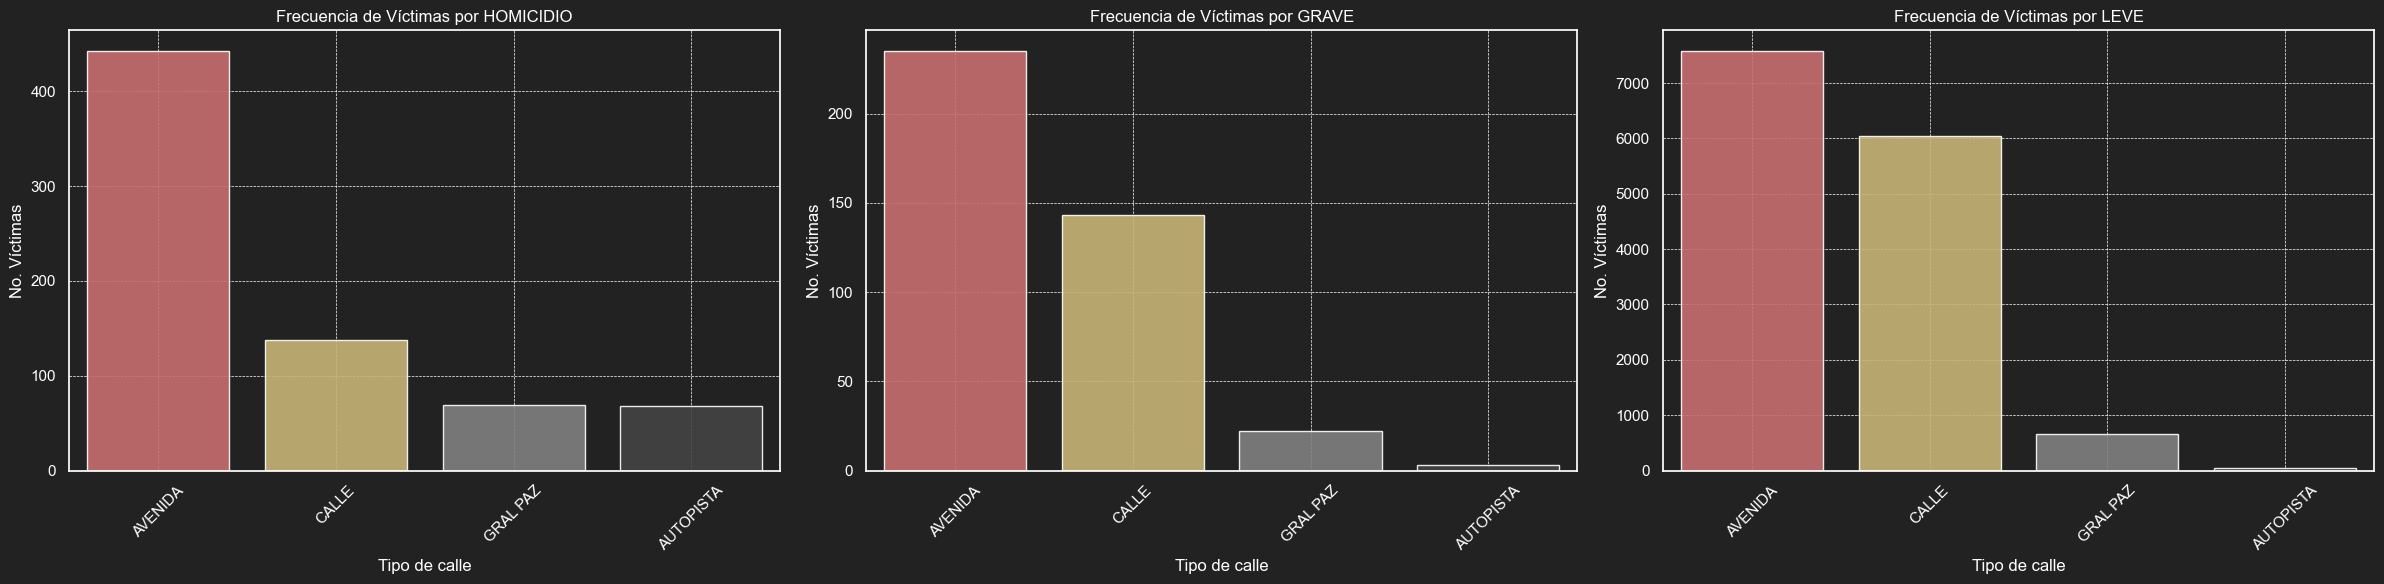

In [47]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']
datos_agrupados_homicidios = homicidios.groupby('TIPO_DE_CALLE').size().sort_values(ascending=False)

# Filtrar por GRAVE
graves = Siniestros[Siniestros['TIPO'] == 'GRAVE']
datos_agrupados_graves = graves.groupby('TIPO_DE_CALLE').size().sort_values(ascending=False)

# Filtrar por LEVE
leves = Siniestros[Siniestros['TIPO'] == 'LEVE']
datos_agrupados_leves = leves.groupby('TIPO_DE_CALLE').size().sort_values(ascending=False)

# Crear un diccionario de colores específicos para cada etiqueta
colores_dict = {'AVENIDA': 'r', 'CALLE': 'y', 'GRAL PAZ': 'gray'}

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(24, 6), facecolor='#222222')

# Gráfico para HOMICIDIO
sns.barplot(ax=axes[0], x=datos_agrupados_homicidios.index, y=datos_agrupados_homicidios.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_homicidios.index], order=datos_agrupados_homicidios.index, alpha=0.9)
axes[0].set_title('Frecuencia de Víctimas por HOMICIDIO', color='white')
axes[0].set_ylabel('No. Víctimas', color='white')
axes[0].set_xlabel('Tipo de calle', color='white')
axes[0].tick_params(axis='x', rotation=45, labelcolor='w')
axes[0].tick_params(axis='y', labelcolor='w')
axes[0].grid(color='w', linestyle='--', linewidth=0.5)
axes[0].set_facecolor('#222222')

# Gráfico para GRAVE
sns.barplot(ax=axes[1], x=datos_agrupados_graves.index, y=datos_agrupados_graves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_graves.index], order=datos_agrupados_graves.index, alpha=0.9)
axes[1].set_title('Frecuencia de Víctimas por GRAVE', color='white')
axes[1].set_ylabel('No. Víctimas', color='white')
axes[1].set_xlabel('Tipo de calle', color='white')
axes[1].tick_params(axis='x', rotation=45, labelcolor='w')
axes[1].tick_params(axis='y', labelcolor='w')
axes[1].grid(color='w', linestyle='--', linewidth=0.5)
axes[1].set_facecolor('#222222')

# Gráfico para LEVE
sns.barplot(ax=axes[2], x=datos_agrupados_leves.index, y=datos_agrupados_leves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_leves.index], order=datos_agrupados_leves.index, alpha=0.9)
axes[2].set_title('Frecuencia de Víctimas por LEVE', color='white')
axes[2].set_ylabel('No. Víctimas', color='white')
axes[2].set_xlabel('Tipo de calle', color='white')
axes[2].tick_params(axis='x', rotation=45, labelcolor='w')
axes[2].tick_params(axis='y', labelcolor='w')
axes[2].grid(color='w', linestyle='--', linewidth=0.5)
axes[2].set_facecolor('#222222')

plt.tight_layout()
plt.show()



Las Avenidas (Carretera) tienen los eventos con más fallecidos y Lesionados, luego las Calles (más que las Autopistas). Vemos que al parecer hay más probabilidad de que un accidente en la Avenida termine en fatalidad que en las calles. Se iba a reemplazar Gral Paz por Avenida, pero al ser un outliers se decide dejar por su importancia como avenida principal.

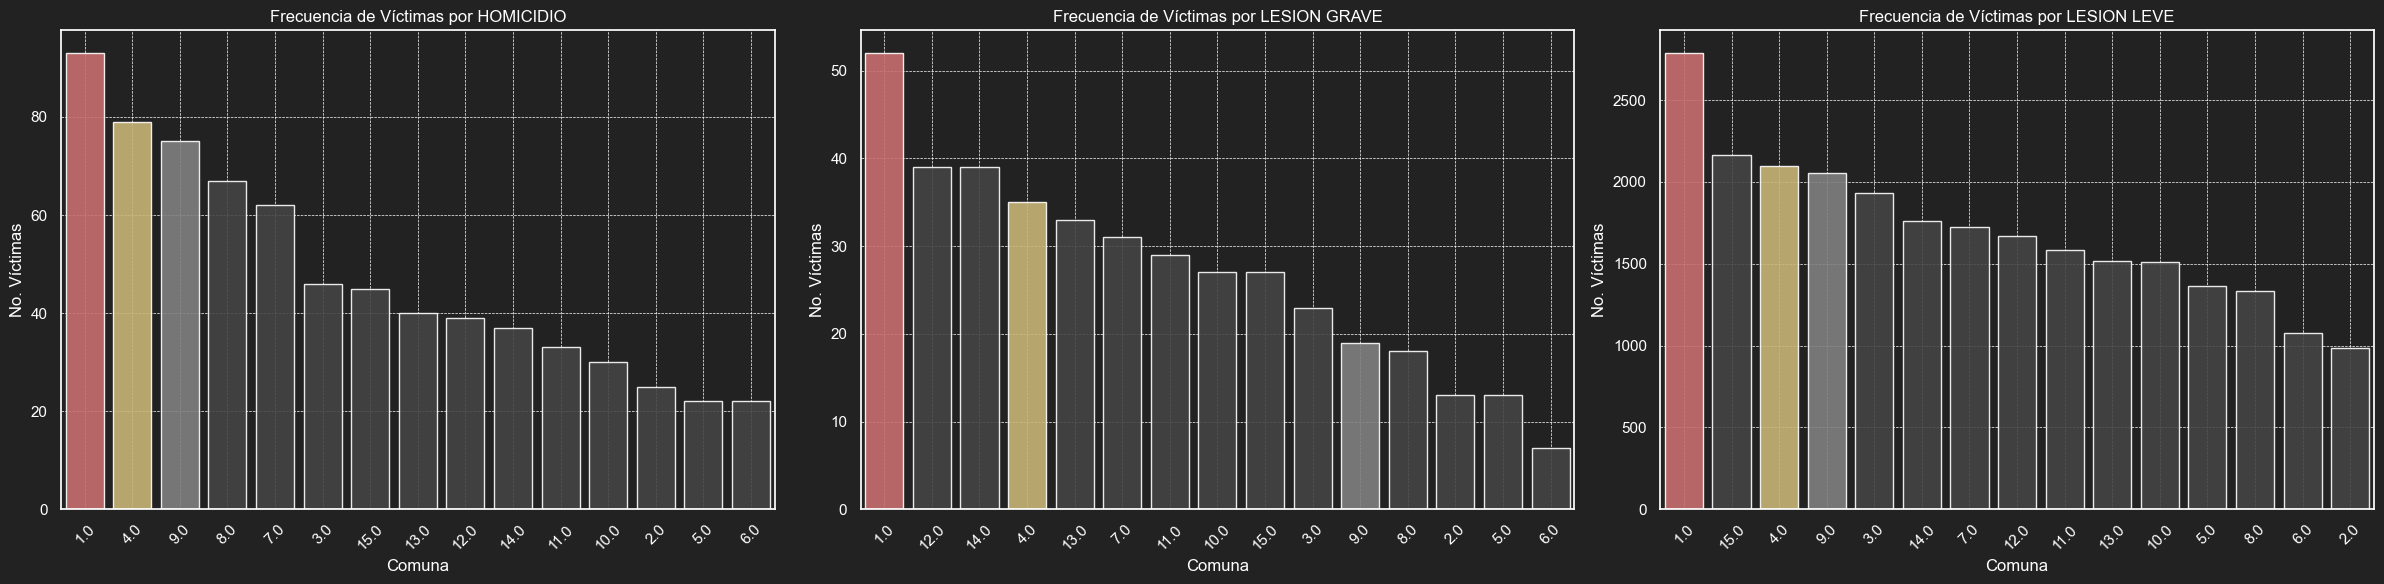

In [48]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']
datos_agrupados_homicidios = homicidios.groupby('COMUNA').size().sort_values(ascending=False)

# Filtrar por GRAVE
graves = Siniestros[Siniestros['TIPO'] == 'GRAVE']
datos_agrupados_graves = graves.groupby('COMUNA').size().sort_values(ascending=False)

# Filtrar por LEVE
leves = Siniestros[Siniestros['TIPO'] == 'LEVE']
datos_agrupados_leves = leves.groupby('COMUNA').size().sort_values(ascending=False)

# Crear un diccionario de colores específicos para cada etiqueta
colores_dict = {1: 'r', 4: 'y', 9: 'gray'}

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(24, 6), facecolor='#222222')

# Gráfico para HOMICIDIO
sns.barplot(ax=axes[0], x=datos_agrupados_homicidios.index, y=datos_agrupados_homicidios.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_homicidios.index], order=datos_agrupados_homicidios.index, alpha=0.9)
axes[0].set_title('Frecuencia de Víctimas por HOMICIDIO', color='white')
axes[0].set_ylabel('No. Víctimas', color='white')
axes[0].set_xlabel('Comuna', color='white')
axes[0].tick_params(axis='x', rotation=45, labelcolor='w')
axes[0].tick_params(axis='y', labelcolor='w')
axes[0].grid(color='w', linestyle='--', linewidth=0.5)
axes[0].set_facecolor('#222222')

# Gráfico para Lesionados Graves
sns.barplot(ax=axes[1], x=datos_agrupados_graves.index, y=datos_agrupados_graves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_graves.index], order=datos_agrupados_graves.index, alpha=0.9)
axes[1].set_title('Frecuencia de Víctimas por LESION GRAVE', color='white')
axes[1].set_ylabel('No. Víctimas', color='white')
axes[1].set_xlabel('Comuna', color='white')
axes[1].tick_params(axis='x', rotation=45, labelcolor='w')
axes[1].tick_params(axis='y', labelcolor='w')
axes[1].grid(color='w', linestyle='--', linewidth=0.5)
axes[1].set_facecolor('#222222')

# Gráfico para Lesionados Leves
sns.barplot(ax=axes[2], x=datos_agrupados_leves.index, y=datos_agrupados_leves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_leves.index], order=datos_agrupados_leves.index, alpha=0.9)
axes[2].set_title('Frecuencia de Víctimas por LESION LEVE', color='white')
axes[2].set_ylabel('No. Víctimas', color='white')
axes[2].set_xlabel('Comuna', color='white')
axes[2].tick_params(axis='x', rotation=45, labelcolor='w')
axes[2].tick_params(axis='y', labelcolor='w')
axes[2].grid(color='w', linestyle='--', linewidth=0.5)
axes[2].set_facecolor('#222222')

plt.tight_layout()
plt.show()


La comuna uno presenta el mayor número de lesiones y homicidios en siniestros viales. EL TOP 3 de comunas con más números de muertes está en el TOP 4 del número de lesionados. Se debe revisar si las comunas con más pon¿blación coinciden con estos gráficos; sin embargo, las carreteras por lo general tienen menos población y mas accidentes fatales, lo cual no implica una relación real. También los lugares menos habitados pueden tener mayor tráfico, como las zonas industriales. Vemos que en la comuna 1 está el puerto de CABA y todo lo que logísticamente representa. y las comunas 4 y 8 limitan con zonas industriales.

### 6. Clasificación de las víctimas por "ROL" (conductor, pasajero, cilista, peatón):

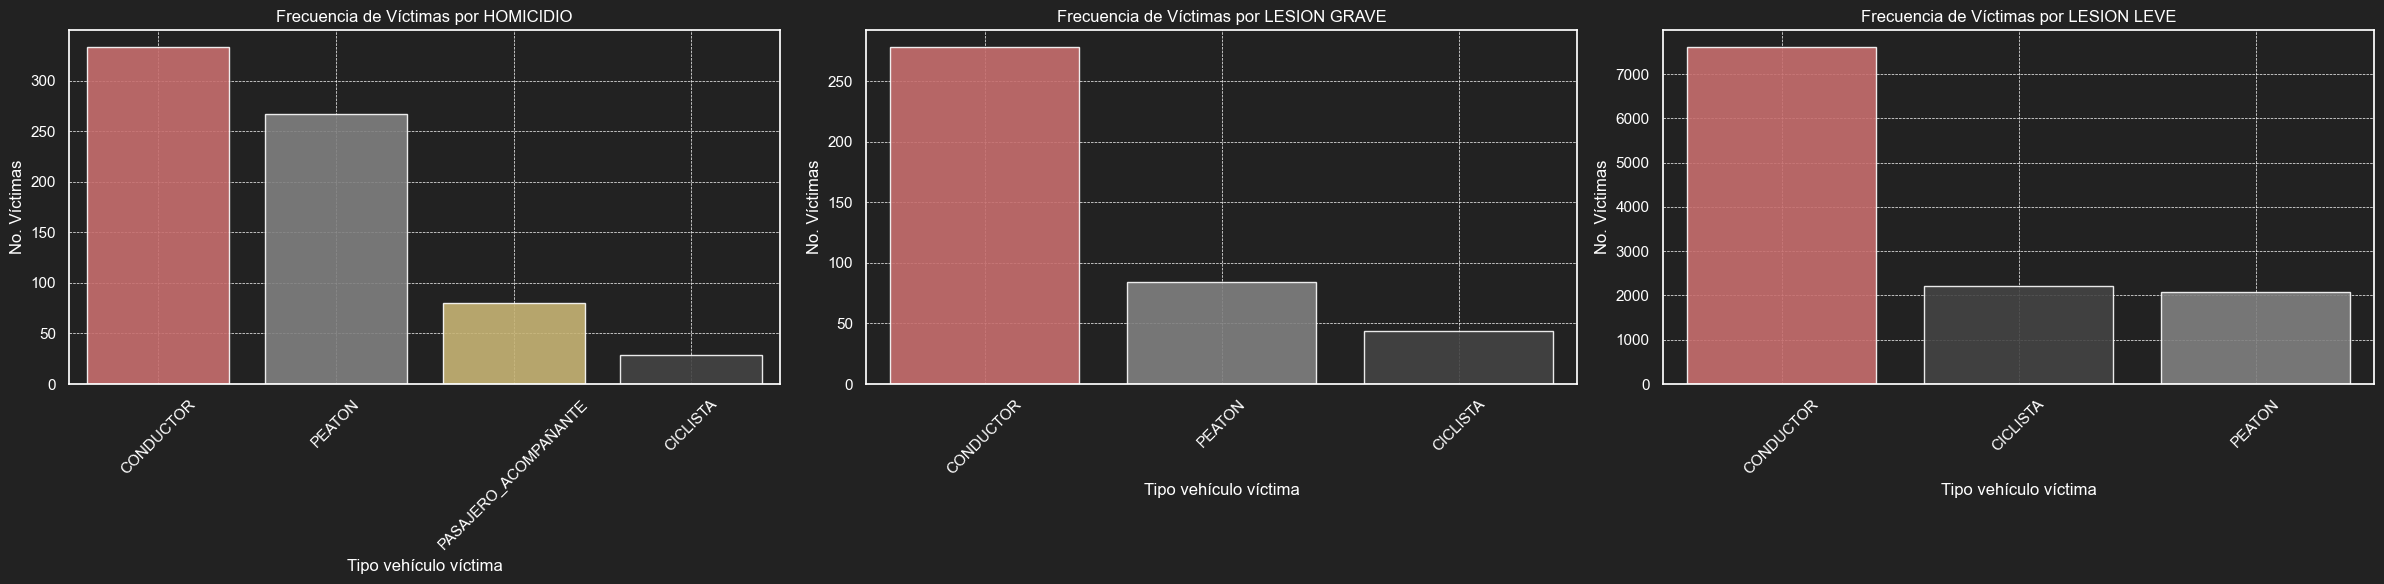

In [50]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']
datos_agrupados_homicidios = homicidios.groupby('ROL').size().sort_values(ascending=False)

# Filtrar por GRAVE
graves = Siniestros[Siniestros['TIPO'] == 'GRAVE']
datos_agrupados_graves = graves.groupby('ROL').size().sort_values(ascending=False)

# Filtrar por LEVE
leves = Siniestros[Siniestros['TIPO'] == 'LEVE']
datos_agrupados_leves = leves.groupby('ROL').size().sort_values(ascending=False)

# Crear un diccionario de colores específicos para cada etiqueta
colores_dict = {'CONDUCTOR': 'r', 'PASAJERO_ACOMPAÑANTE': 'y', 'PEATON': 'gray'}

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(24, 6), facecolor='#222222')

# Gráfico para HOMICIDIO
sns.barplot(ax=axes[0], x=datos_agrupados_homicidios.index, y=datos_agrupados_homicidios.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_homicidios.index], order=datos_agrupados_homicidios.index, alpha=0.9)
axes[0].set_title('Frecuencia de Víctimas por HOMICIDIO', color='white')
axes[0].set_ylabel('No. Víctimas', color='white')
axes[0].set_xlabel('Tipo vehículo víctima', color='white')
axes[0].tick_params(axis='x', rotation=45, labelcolor='w')
axes[0].tick_params(axis='y', labelcolor='w')
axes[0].grid(color='w', linestyle='--', linewidth=0.5)
axes[0].set_facecolor('#222222')

# Gráfico para Lesionados Graves
sns.barplot(ax=axes[1], x=datos_agrupados_graves.index, y=datos_agrupados_graves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_graves.index], order=datos_agrupados_graves.index, alpha=0.9)
axes[1].set_title('Frecuencia de Víctimas por LESION GRAVE', color='white')
axes[1].set_ylabel('No. Víctimas', color='white')
axes[1].set_xlabel('Tipo vehículo víctima', color='white')
axes[1].tick_params(axis='x', rotation=45, labelcolor='w')
axes[1].tick_params(axis='y', labelcolor='w')
axes[1].grid(color='w', linestyle='--', linewidth=0.5)
axes[1].set_facecolor('#222222')

# Gráfico para Lesionados Leves
sns.barplot(ax=axes[2], x=datos_agrupados_leves.index, y=datos_agrupados_leves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_leves.index], order=datos_agrupados_leves.index, alpha=0.9)
axes[2].set_title('Frecuencia de Víctimas por LESION LEVE', color='white')
axes[2].set_ylabel('No. Víctimas', color='white')
axes[2].set_xlabel('Tipo vehículo víctima', color='white')
axes[2].tick_params(axis='x', rotation=45, labelcolor='w')
axes[2].tick_params(axis='y', labelcolor='w')
axes[2].grid(color='w', linestyle='--', linewidth=0.5)
axes[2].set_facecolor('#222222')

plt.tight_layout()
plt.show()




El conductor, es quien representa el mayor número de muertes por accidentes de tránsito. Es extraño que hayan  pocos registros de lesiones con ciclistas, peatones y pasajeros, pero esto se debe a que la calidad del registro en lesiones es de menor calidad que el registro de muertes y este campo requirió imputaciones que claramente 

### 7. Clasificación de las víctimas Sexo y Rango Etario:

Homicidios en siniestros viales:

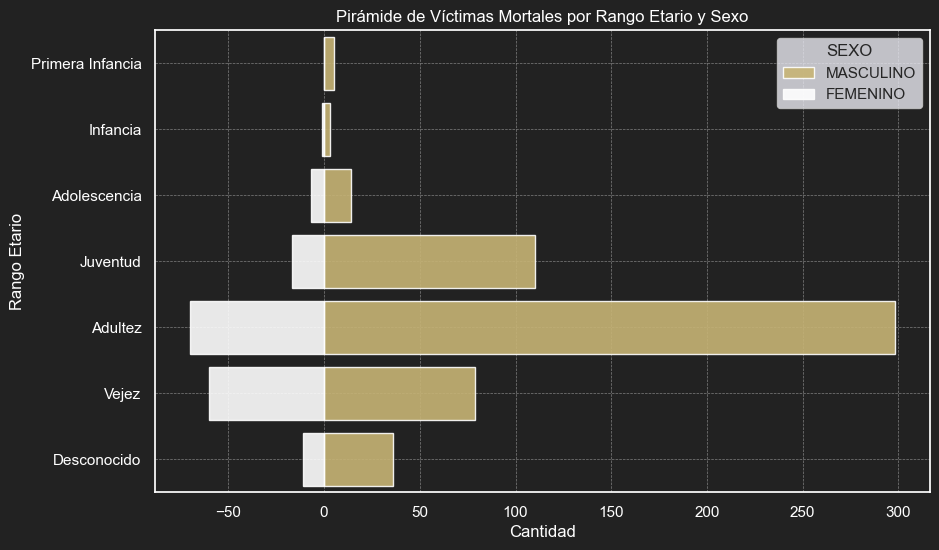

In [51]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']

# Orden de las categorías de R_Etario
orden_categorias = ['Primera Infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Vejez', 'Desconocido']

# Crear una pirámide de población utilizando seaborn
plt.figure(figsize=(10, 6), facecolor='#222222')
plt.gca().set_facecolor('#222222')  # Establecer el fondo negro

# Filtrar por género
hombres = homicidios[homicidios['SEXO'] == 'MASCULINO']
mujeres = homicidios[homicidios['SEXO'] == 'FEMENINO']

# Obtener frecuencias de cada categoría en el orden deseado
frecuencias_hombres = hombres['R_Etario'].value_counts().reindex(orden_categorias).fillna(0)
frecuencias_mujeres = mujeres['R_Etario'].value_counts().reindex(orden_categorias).fillna(0)

# Barplot para hombres
sns.barplot(x=frecuencias_hombres, y=frecuencias_hombres.index, color='y', label='MASCULINO', alpha=0.9)

# Barplot para mujeres con frecuencias negativas para ubicar a la derecha
sns.barplot(x=-frecuencias_mujeres, y=frecuencias_mujeres.index, color='w', label='FEMENINO', alpha=0.9)

# Ajustar el diseño y mostrar el gráfico
plt.title('Pirámide de Víctimas Mortales por Rango Etario y Sexo', color='white')
plt.xlabel('Cantidad', color='white')
plt.ylabel('Rango Etario', color='white')
plt.legend(title='SEXO')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

Los hombres Jovenes y Adultos mueren con más frecuencia en accidentes de tránsito. Las mujeres Jóvenes en cambio, no tienen tantos registros mortales, sí las mujeres en el rango de Adulta Mayor. Los adultos tienen una frecuencia muy alta con respecto de los demás, puede ser entonces que los conductores sean las personas con mayor riesgo de mortalidad en un siniestro. (revisar rango etario de conductores en CABA)

Lesiones Graves en Siniestros Viales:

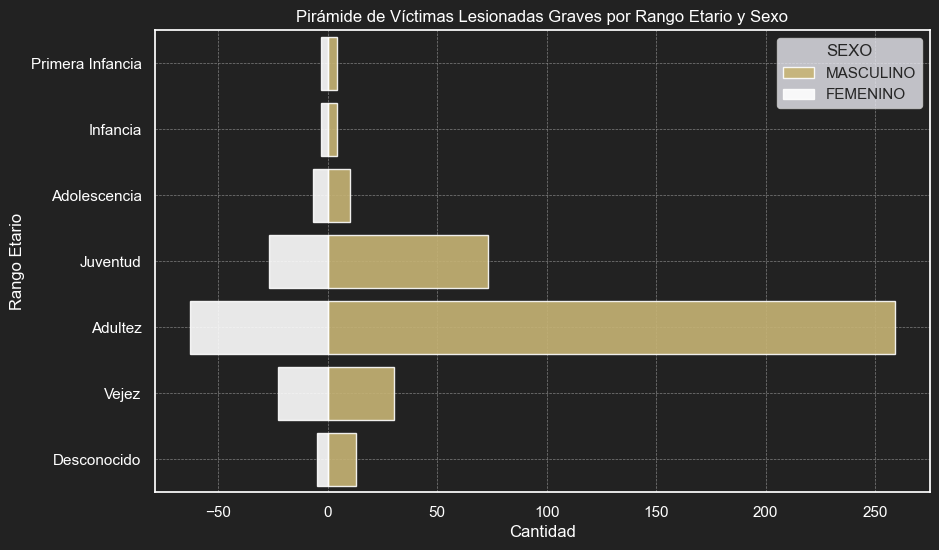

In [52]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'GRAVE']

# Orden de las categorías de R_Etario
orden_categorias = ['Primera Infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Vejez', 'Desconocido']

# Crear una pirámide de población utilizando seaborn
plt.figure(figsize=(10, 6), facecolor='#222222')
plt.gca().set_facecolor('#222222')  # Establecer el fondo negro

# Filtrar por género
hombres = homicidios[homicidios['SEXO'] == 'MASCULINO']
mujeres = homicidios[homicidios['SEXO'] == 'FEMENINO']

# Obtener frecuencias de cada categoría en el orden deseado
frecuencias_hombres = hombres['R_Etario'].value_counts().reindex(orden_categorias).fillna(0)
frecuencias_mujeres = mujeres['R_Etario'].value_counts().reindex(orden_categorias).fillna(0)

# Barplot para hombres
sns.barplot(x=frecuencias_hombres, y=frecuencias_hombres.index, color='y', label='MASCULINO', alpha=0.9)

# Barplot para mujeres con frecuencias negativas para ubicar a la derecha
sns.barplot(x=-frecuencias_mujeres, y=frecuencias_mujeres.index, color='w', label='FEMENINO', alpha=0.9)

# Ajustar el diseño y mostrar el gráfico
plt.title('Pirámide de Víctimas Lesionadas Graves por Rango Etario y Sexo', color='white')
plt.xlabel('Cantidad', color='white')
plt.ylabel('Rango Etario', color='white')
plt.legend(title='SEXO')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

Las lesiones graves tienen la misma tendencia que los accidentes mortales, no obstante los registros son casi iguales o menores. suponiendo que esto no se debe a una falta de registros, podríamos inferir que en los casos de accidentes viales en CABA cuando son Graves, realmente terminan en fatalidad la mayoría de las veces.

Lesiones Leves en Siniestros Viales:

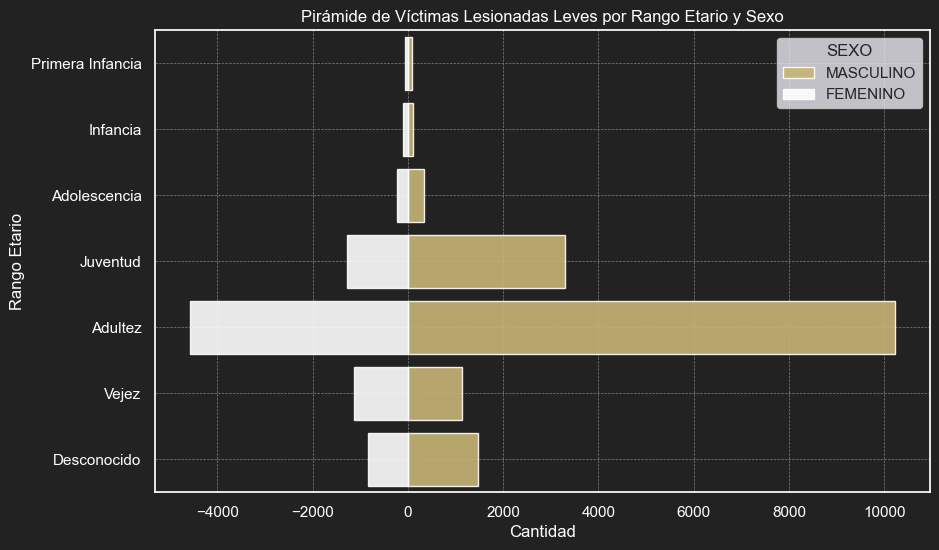

In [53]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'LEVE']

# Orden de las categorías de R_Etario
orden_categorias = ['Primera Infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Vejez', 'Desconocido']

# Crear una pirámide de población utilizando seaborn
plt.figure(figsize=(10, 6), facecolor='#222222')
plt.gca().set_facecolor('#222222')  # Establecer el fondo negro

# Filtrar por género
hombres = homicidios[homicidios['SEXO'] == 'MASCULINO']
mujeres = homicidios[homicidios['SEXO'] == 'FEMENINO']

# Obtener frecuencias de cada categoría en el orden deseado
frecuencias_hombres = hombres['R_Etario'].value_counts().reindex(orden_categorias).fillna(0)
frecuencias_mujeres = mujeres['R_Etario'].value_counts().reindex(orden_categorias).fillna(0)

# Barplot para hombres
sns.barplot(x=frecuencias_hombres, y=frecuencias_hombres.index, color='y', label='MASCULINO', alpha=0.9)

# Barplot para mujeres con frecuencias negativas para ubicar a la derecha
sns.barplot(x=-frecuencias_mujeres, y=frecuencias_mujeres.index, color='w', label='FEMENINO', alpha=0.9)

# Ajustar el diseño y mostrar el gráfico
plt.title('Pirámide de Víctimas Lesionadas Leves por Rango Etario y Sexo', color='white')
plt.xlabel('Cantidad', color='white')
plt.ylabel('Rango Etario', color='white')
plt.legend(title='SEXO')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

Se tienen varios registros sin edad, pero la tendencia es básicamente la misma.

### 8. Clasificación por tipo de vehículo implicado y presuntamente acusado:

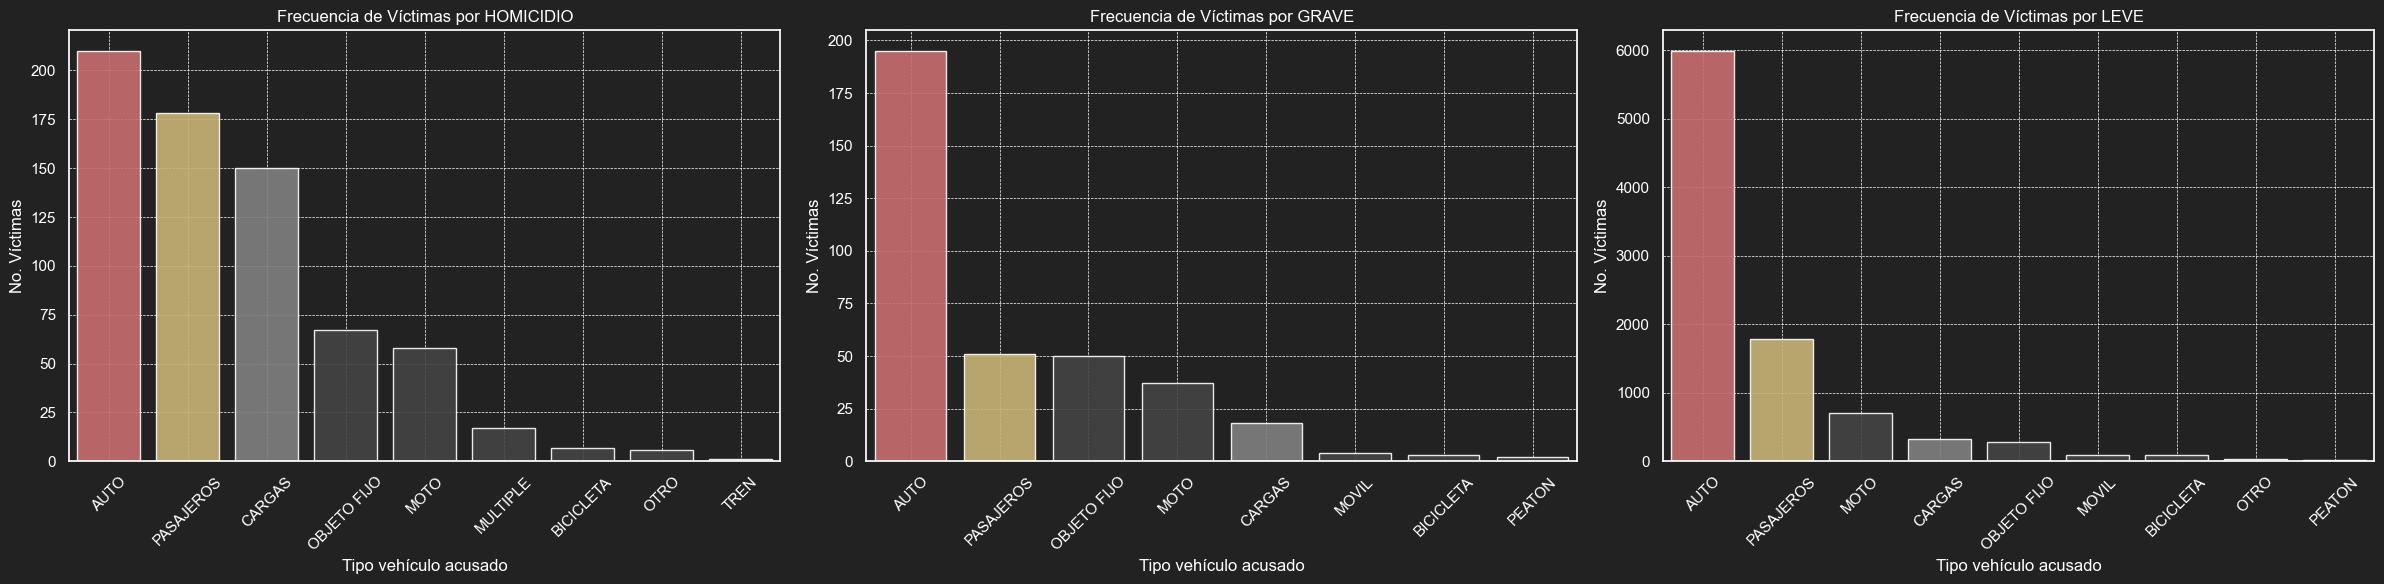

In [54]:
# Filtrar por HOMICIDIO
homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']
datos_agrupados_homicidios = homicidios.groupby('ACUSADO').size().sort_values(ascending=False)

# Filtrar por GRAVE
graves = Siniestros[Siniestros['TIPO'] == 'GRAVE']
datos_agrupados_graves = graves.groupby('ACUSADO').size().sort_values(ascending=False)

# Filtrar por LEVE
leves = Siniestros[Siniestros['TIPO'] == 'LEVE']
datos_agrupados_leves = leves.groupby('ACUSADO').size().sort_values(ascending=False)

# Crear un diccionario de colores específicos para cada etiqueta
colores_dict = {'AUTO': 'r', 'PASAJEROS': 'y', 'CARGAS': 'gray'}

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(24, 6), facecolor='#222222')

# Gráfico para HOMICIDIO
sns.barplot(ax=axes[0], x=datos_agrupados_homicidios.index, y=datos_agrupados_homicidios.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_homicidios.index], order=datos_agrupados_homicidios.index, alpha=0.9)
axes[0].set_title('Frecuencia de Víctimas por HOMICIDIO', color='white')
axes[0].set_ylabel('No. Víctimas', color='white')
axes[0].set_xlabel('Tipo vehículo acusado', color='white')
axes[0].tick_params(axis='x', rotation=45, labelcolor='w')
axes[0].tick_params(axis='y', labelcolor='w')
axes[0].grid(color='w', linestyle='--', linewidth=0.5)
axes[0].set_facecolor('#222222')

# Gráfico para GRAVE
sns.barplot(ax=axes[1], x=datos_agrupados_graves.index, y=datos_agrupados_graves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_graves.index], order=datos_agrupados_graves.index, alpha=0.9)
axes[1].set_title('Frecuencia de Víctimas por GRAVE', color='white')
axes[1].set_ylabel('No. Víctimas', color='white')
axes[1].set_xlabel('Tipo vehículo acusado', color='white')
axes[1].tick_params(axis='x', rotation=45, labelcolor='w')
axes[1].tick_params(axis='y', labelcolor='w')
axes[1].grid(color='w', linestyle='--', linewidth=0.5)
axes[1].set_facecolor('#222222')

# Gráfico para LEVE
sns.barplot(ax=axes[2], x=datos_agrupados_leves.index, y=datos_agrupados_leves.values,
            palette=[colores_dict.get(label, '#444444') for label in datos_agrupados_leves.index], order=datos_agrupados_leves.index, alpha=0.9)
axes[2].set_title('Frecuencia de Víctimas por LEVE', color='white')
axes[2].set_ylabel('No. Víctimas', color='white')
axes[2].set_xlabel('Tipo vehículo acusado', color='white')
axes[2].tick_params(axis='x', rotation=45, labelcolor='w')
axes[2].tick_params(axis='y', labelcolor='w')
axes[2].grid(color='w', linestyle='--', linewidth=0.5)
axes[2].set_facecolor('#222222')

plt.tight_layout()
plt.show()


Los Autos están implicados en el mayor número de hechos y víctimas en muertes y lesiones. Las motos aunque son más damnificadas como víctimas, no lo son como presuntos acusados y esto es porque los accidentes mortales se dan más entre autos y motos, donde las motos son más vulnerables.  También podemos observar que los vehículos de carga tiene un mayor índice de muertes si se compara con el número de lesiones leves, lo cual implica que cada vez que se involucra un vehículo de carga en un accidente la probabilidad de fatalidad es mayor que en los otros tipos de vehículos.

### 9. Mapa de Calor de Número de Homicidios por Siniestros Viales CABA:

In [55]:
# Filtrar por LESION
Homicidios = Siniestros[Siniestros['TIPO'] == 'HOMICIDIO']

# Crear un mapa centrado en CABA
mapa_caba = folium.Map(location=[-34.61, -58.38], zoom_start=12)

# Agregar datos del DataFrame al mapa de calor
datos_mapa_calor = Homicidios[['pos y', 'pos x']].dropna()
heat_data = [[point['pos y'], point['pos x']] for index, point in datos_mapa_calor.iterrows()]
HeatMap(heat_data).add_to(mapa_caba)

# Ajustar la densidad del mapa de calor con el parámetro radius
HeatMap(heat_data, radius=20).add_to(mapa_caba)

# Guardar el mapa como un archivo HTML o mostrarlo directamente
mapa_caba.save("mapa_calor_caba_homicidios.html")
# Opcional: para mostrarlo directamente en el notebook
mapa_caba

Se observa una concentración de los accidentes mortales en la zona Sur-Oriental de la Ciudad y si se realiza acercamiento al mapa podemos enconrar cruces y avenidas realmente peligrosas. Se confirma que las zonas de mayor accidentalidad es la comuna 1 (zona industrial) seguramente al revisar la población sea una zona poco habitada pero con gran flujo vehícular.

Se debe resaltar el punto entre "Lisandro Mesa" Avenida General Paz al hacer acercameinto al mapa. Así como varios puntos de interés.

### 10. Mapa de Calor de Número de Lesiones LEVES por Siniestros Viales CABA:

In [56]:
# Filtrar por LESION
Lesiones = Siniestros[Siniestros['TIPO'] == 'LEVE']

# Crear un mapa centrado en CABA
mapa_caba = folium.Map(location=[-34.61, -58.38], zoom_start=12)

# Agregar datos del DataFrame al mapa de calor
datos_mapa_calor = Lesiones[['pos y', 'pos x']].dropna()
heat_data = [[point['pos y'], point['pos x']] for index, point in datos_mapa_calor.iterrows()]
HeatMap(heat_data).add_to(mapa_caba)

# Ajustar la densidad del mapa de calor con el parámetro radius
HeatMap(heat_data, radius=13).add_to(mapa_caba)

# Guardar el mapa como un archivo HTML o mostrarlo directamente
mapa_caba.save("mapa_calor_caba_Lesiones.html")
# Opcional: para mostrarlo directamente en el notebook
mapa_caba

Los insidentes que generaron Lesiones no se concentran previsiblemente en ningún sector, al hacer acercamiento, aparentemente la zona sur-oriental puede tener más insidentes. Pero en especial solo se resaltan cruces y avenidas con recurrencias altas.

### 11. Abrir archivo de Población:

In [57]:
Poblacion = pd.read_csv('Datos_Dashboard\Poblacion.csv')        # Datos de Hechos de Homicidios y Lesiones
print(Poblacion.columns)
print('--------------------\n')
Poblacion.info()

Index(['Unnamed: 0', 'Año', 'Semestre', 'Aux_Sem', 'Comuna', 'Población',
       'No. Muertes', 'No. Graves', 'No. Leves', 'THSV', 'THSV_1', 'PR_THSV',
       'M. Moto', 'M. Moto_1', 'I. MOTO'],
      dtype='object')
--------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   180 non-null    int64  
 1   Año          180 non-null    int64  
 2   Semestre     180 non-null    int64  
 3   Aux_Sem      180 non-null    object 
 4   Comuna       180 non-null    int64  
 5   Población    180 non-null    float64
 6   No. Muertes  180 non-null    float64
 7   No. Graves   180 non-null    float64
 8   No. Leves    180 non-null    float64
 9   THSV         180 non-null    float64
 10  THSV_1       180 non-null    float64
 11  PR_THSV      179 non-null    float64
 12  M. Moto      180 non-null    int64  
 13  M. Moto_1    180 non-

#### 12. Verificar correlación entre las varibeles numéricas:

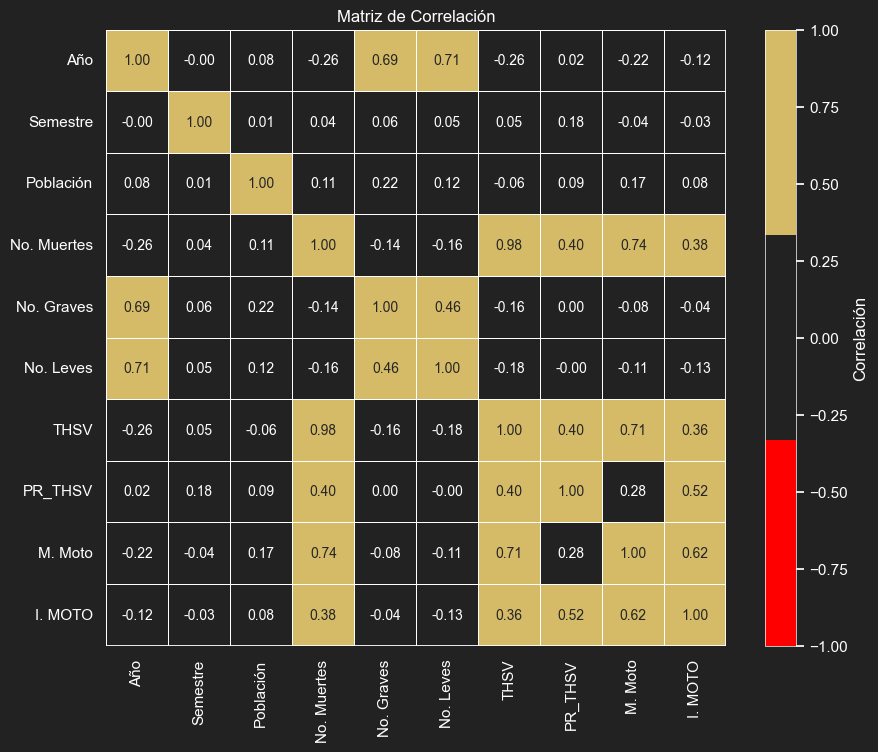

In [58]:
# Datos numéricos
Poblacion_corr = Poblacion[['Año', 'Semestre', 'Población', 'No. Muertes', 'No. Graves', 'No. Leves','THSV', 'PR_THSV', 'M. Moto', 'I. MOTO']]

# Calcular la matriz de correlación
correlation_matrix = Poblacion_corr.corr()

# Definir tu paleta de colores personalizada (rojo, amarillo, negro)
custom_palette = sns.color_palette(['#FF0000', '#222222', 'y'])

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8), facecolor='#222222')
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlación'}, annot_kws={'size': 10}, vmin=-1, vmax=1)

# Configurar el color de las etiquetas del eje x y eje y
heatmap.set_xticklabels(heatmap.get_xticklabels(), color='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), color='white')

# Configurar el color del marco
cbar = heatmap.collections[0].colorbar
cbar.outline.set_edgecolor('white')
cbar.outline.set_linewidth(0.5)

# Configurar el color de la barra de color
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.tick_params(axis='y', colors='white')

# Configurar el color del texto de la barra de color
cbar.set_label('Correlación', color='white')

# Configurar el color del marco del gráfico
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Ajustar el color del recuadro de la derecha
plt.gca().add_patch(Rectangle((len(correlation_matrix.columns), 0), 1, len(correlation_matrix), fill=False, edgecolor='white', lw=2))

# Ajustar el color del recuadro inferior
plt.gca().add_patch(Rectangle((0, len(correlation_matrix)), len(correlation_matrix.columns), 1, fill=False, edgecolor='white', lw=2))

plt.title('Matriz de Correlación', color='white')
plt.show()


A parte de las correlaciones obvias (la misma variable y los indicadores construidos a partir otras variables), se puede observar la alta correlación entre el AÑO y el No. de Lesiones. Tambíen las muertes totales con las muertes de Moto. Es extraño que no exista algo de correlación entre el No. de Lesiones y el No. de Muertes. Pero esto puede corresponder tambien a la poca posibilidad de registrar todos los eventos. Tampoco se ve relación entre la población y el número de muertes o lesiones, pero ya hemos revisado que no debería dado que el lugar con mayor accidentalidad es la comuna 1 donde no hay una alta población viviendo pero sí transitando.

Podemos revisar esto solo para los años 2019 y 2021 y observar si cambia el análisis, dado que sabemos que no hay datos para lesiones en los años anteriores:

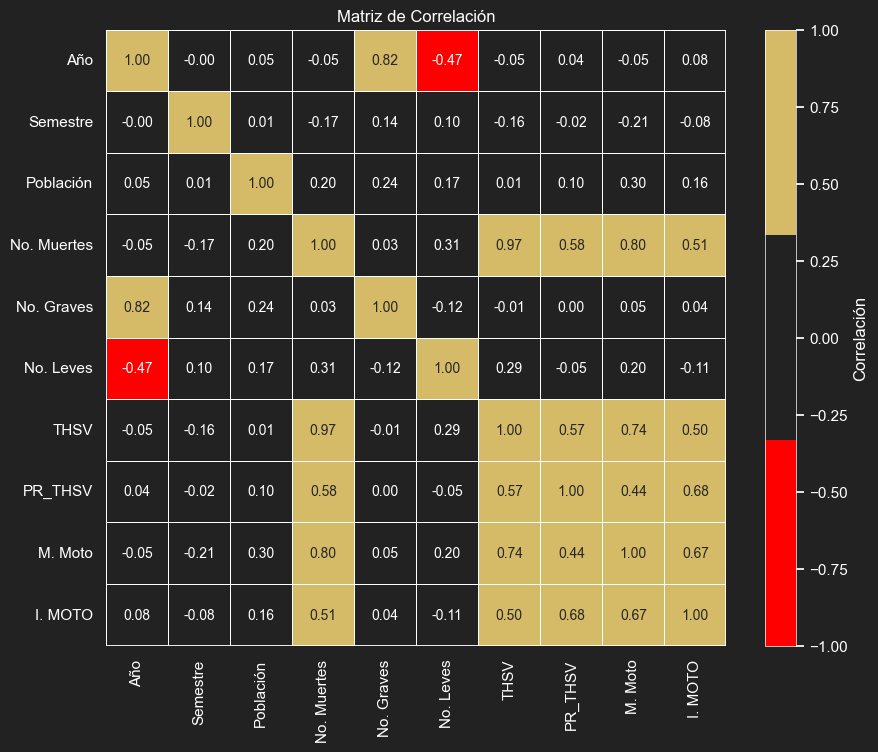

In [59]:
# Filtrar los datos para incluir solo los años 2020 y 2021
Poblacion_corr = Poblacion[Poblacion['Año'].isin([2019, 2021])]

# Seleccionar las columnas relevantes para el análisis de correlación
Poblacion_corr = Poblacion_corr[['Año', 'Semestre', 'Población', 'No. Muertes', 'No. Graves', 'No. Leves','THSV', 'PR_THSV', 'M. Moto', 'I. MOTO']]

# Calcular la matriz de correlación
correlation_matrix = Poblacion_corr.corr()

# Definir tu paleta de colores personalizada (rojo, amarillo, negro)
custom_palette = sns.color_palette(['#FF0000', '#222222', 'y'])

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8), facecolor='#222222')
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlación'}, annot_kws={'size': 10}, vmin=-1, vmax=1)

# Configurar el color de las etiquetas del eje x y eje y
heatmap.set_xticklabels(heatmap.get_xticklabels(), color='white')
heatmap.set_yticklabels(heatmap.get_yticklabels(), color='white')

# Configurar el color del marco
cbar = heatmap.collections[0].colorbar
cbar.outline.set_edgecolor('white')
cbar.outline.set_linewidth(0.5)

# Configurar el color de la barra de color
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.tick_params(axis='y', colors='white')

# Configurar el color del texto de la barra de color
cbar.set_label('Correlación', color='white')

# Configurar el color del marco del gráfico
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Ajustar el color del recuadro de la derecha
plt.gca().add_patch(Rectangle((len(correlation_matrix.columns), 0), 1, len(correlation_matrix), fill=False, edgecolor='white', lw=2))

# Ajustar el color del recuadro inferior
plt.gca().add_patch(Rectangle((0, len(correlation_matrix)), len(correlation_matrix.columns), 1, fill=False, edgecolor='white', lw=2))

plt.title('Matriz de Correlación', color='white')
plt.show()

Se mantienen algunas correlaciones de tiempo vs No. Víctimas, llamando la atención la relación inversamente proporcional entre Año y No. se de Lesiones leves.

### 13. Evolución del número de muertes en accidentes de tránsito por año en CABA:

C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

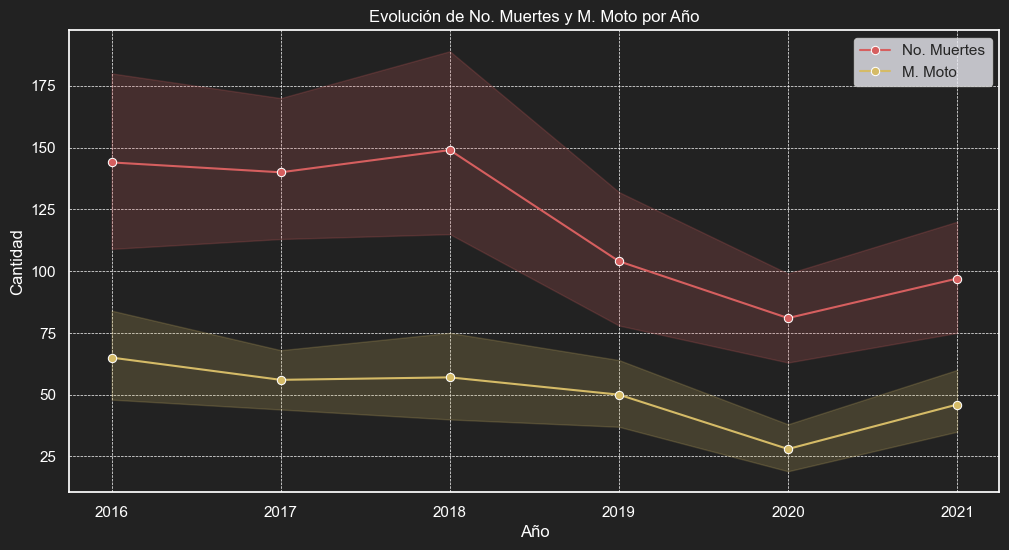

In [60]:
# Filtrar las columnas y los datos relevantes
datos_muertes_moto = Poblacion[['Año', 'No. Muertes', 'M. Moto']]

# Configuración de estilo y colores
sns.set(style="darkgrid", palette="muted")

# Configuración del fondo oscuro
plt.figure(figsize=(12, 6), facecolor='#222222')  # Ajusta el color del fondo aquí

# Crear el gráfico de líneas
sns.lineplot(x='Año', y='No. Muertes', data=datos_muertes_moto, label='No. Muertes', marker='o', color='r', estimator='sum')
sns.lineplot(x='Año', y='M. Moto', data=datos_muertes_moto, label='M. Moto', marker='o', color='y', estimator='sum')


# Configuración del gráfico
plt.title('Evolución de No. Muertes y M. Moto por Año', color='white')
plt.xlabel('Año', color='white')
plt.ylabel('Cantidad', color='white')
plt.legend()  # Agregar leyenda
plt.grid(True, color='white', linestyle='--', linewidth=0.5)

# Configurar el color del marco del gráfico
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Configurar el color del fondo del interior del gráfico
plt.gca().set_facecolor('#222222')  # Ajusta el color del fondo del interior del gráfico aquí

# Configurar el color de las etiquetas del eje X y Y
plt.xticks(color='white')
plt.yticks(color='white')

# Mostrar el gráfico
plt.show()


El número de muertes en general y asociados a motos tienen le mismo comportamiento (esto se verá con mayor detalle en el Dashboard). había un decrecimiento en el año 2018 hasta el 2020, pero claramente en el 2021 la preicupación es que la tendencia de disminución no se mantuvo.

### 14. Revisión de la evolución de la tasa de homicidios general y de accidentes de moto:

C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\davin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

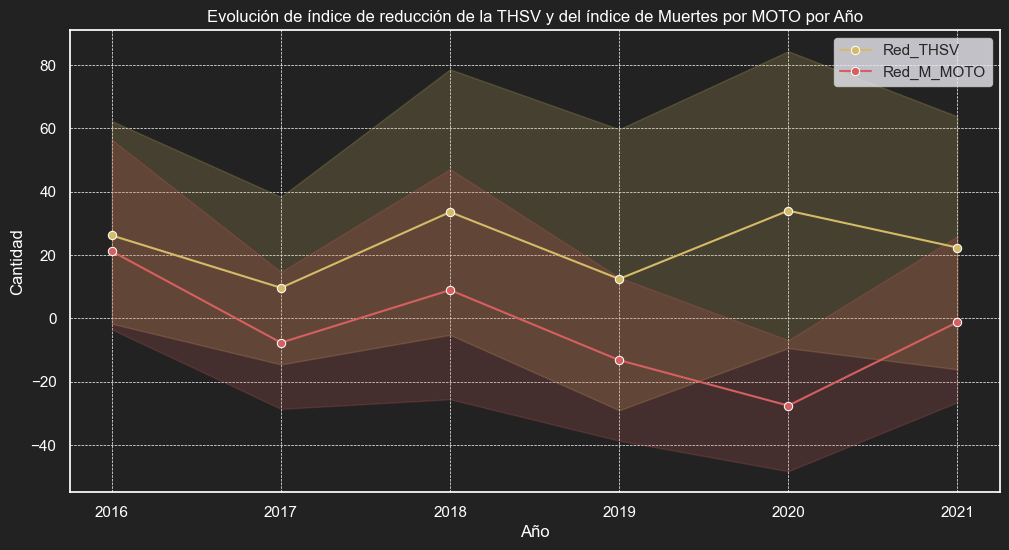

In [61]:
# Filtrar las columnas y los datos relevantes
datos_muertes_moto = Poblacion[['Año', 'PR_THSV', 'I. MOTO']]


# Configuración de estilo y colores
sns.set(style="darkgrid", palette="muted")

# Configuración del fondo oscuro
plt.figure(figsize=(12, 6), facecolor='#222222')  # Ajusta el color del fondo aquí

# Crear el gráfico de líneas
sns.lineplot(x='Año', y='PR_THSV', data=datos_muertes_moto, label='Red_THSV', marker='o', color='y')
sns.lineplot(x='Año', y='I. MOTO', data=datos_muertes_moto, label='Red_M_MOTO', marker='o', color='r')

# Configuración del gráfico
plt.title('Evolución de índice de reducción de la THSV y del índice de Muertes por MOTO por Año', color='white')
plt.xlabel('Año', color='white')
plt.ylabel('Cantidad', color='white')
plt.legend()  # Agregar leyenda
plt.grid(True, color='white', linestyle='--', linewidth=0.5)

# Configurar el color del marco del gráfico
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Configurar el color del fondo del interior del gráfico
plt.gca().set_facecolor('#222222')  # Ajusta el color del fondo del interior del gráfico aquí

# Configurar el color de las etiquetas del eje X y Y
plt.xticks(color='white')
plt.yticks(color='white')

# Mostrar el gráfico
plt.show()

**THSV** = *Tasa de Homicidios en Siniestros Viales en general "('THSV'='No. Muertes' / 'Población')* 100000".*

**Red_THSV** = *% Reducción con respecto del periodo anterior (Semestre)*

**Red_M_MOTO** = *% de reducción de Homicidios en accidentes de MOTO "('I. MOTO' = 100 * ('M. Moto' - 'M. Moto_1') / 'M. Moto_1')*

El gráfico indica que la tas de Muertes comparadas con el periodo anterior aumenta y no se estaría cumpliendo la meta de la reducción del numero de muerte en general y principalmente en elcaso de MOTOS. En el dashborad al filtrar el la tasa de homicidios sin la afectación de las MOTOS, seguramente podría reflejar una disminuación poco significativa si revisamos la meta del 10%.

### 15. Pirámide de accidentalidad y Gravedad de los accidentes viales:

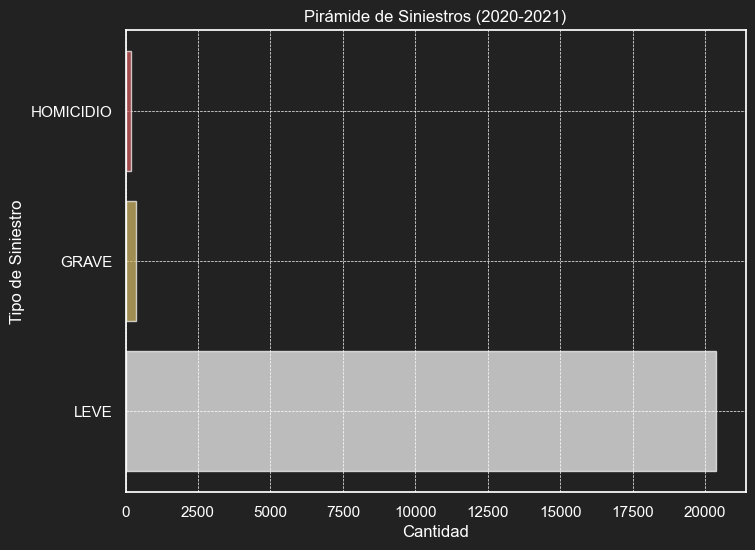

In [62]:
# Filtrar datos para los años 2020 y 2021
siniestros_2020_2021 = Siniestros[Siniestros['AÑO'].isin([2019, 2021])]

# Contar la frecuencia de cada tipo de siniestro
tipo_counts = siniestros_2020_2021['TIPO'].value_counts()

# Ordenar los tipos para garantizar la orientación correcta de la pirámide
tipos_ordenados = ['LEVE', 'GRAVE', 'HOMICIDIO']
tipo_counts = tipo_counts.reindex(tipos_ordenados)

# Configuración del fondo oscuro
plt.figure(figsize=(8, 6), facecolor='#222222')  # Ajusta el color del fondo aquí

# Crear la pirámide con barras horizontales y agregar transparencia
plt.barh(tipo_counts.index, tipo_counts.values, color=['w', 'y', 'r'], alpha=0.7)

# Configuración del gráfico
plt.title('Pirámide de Siniestros (2020-2021)', color='white')
plt.xlabel('Cantidad', color='white')
plt.ylabel('Tipo de Siniestro', color='white')
plt.grid(True, color='white', linestyle='--', linewidth=0.5)

# Configurar el color del marco del gráfico
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')

# Configurar el color del fondo del interior del gráfico
plt.gca().set_facecolor('#222222')  # Ajusta el color del fondo del interior del gráfico aquí

# Configurar el color de las etiquetas del eje X y Y
plt.xticks(color='white')
plt.yticks(color='white')

# Mostrar el gráfico
plt.show()

Aquí vemos que podemos hacer comparar los eventos como la pirámide de bird en la causalidad de eventos graves y que termina en muertes.

"Antes de cada muerte, debe haber cientos de accidentes Graves y miles de lesiones leves". Sino es así, se deben mejorar el sistema de recolección de datos.

Ya se tiene suficiente información para trabajar en los dashborad donde se deben descubrir nuevas tendencias aprovechando la posibilidad de hacer filtros dinámicos entre gráficos.